# 2018 Iris clustering project

## Table of Contents
- [Introduction](#intro)
- [Importing necessary libraries](#importing_lib)
- [Some information about the features](#Info)
- [Exploratory Data Analysis](#EDA)
- [Kmeans Clustering](#K-means)
- [Plotting the data in each cluster](#plot_clusters)
- [Plotting Spider Charts for Centroid](#spider)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

The clustering algorithm like Kmeans is very widly used in the real application

<a id='importing_lib'></a>
** Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd


# changing the backed for the matplotlib
import matplotlib
matplotlib.use('TkAgg')       # should be before the importing to matplotlib
import matplotlib.pyplot as plt

# pltting style
from matplotlib import style 
style.use("ggplot")

# plotting in jupyter notebook
%matplot inline
%pylab inline

# Drawing the grid for subplot
import matplotlib.gridspec as gridspec
 

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
ERROR:root:Line magic function `%matplot` not found.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# import for the spider charts

#import numpy as np
#import matplotlib.pyplot as plt

from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

<a id='Info'></a>
** Some information about the features **

if your data < 10,000 just use kmeans:
  if > 10,000 use min-batch kmeans

In [3]:
iris = load_iris()
Data = iris.data
Target = iris.target

In [4]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [5]:
unique, counts = np.unique(Target, return_counts=True)
unique ,counts

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [6]:
len(iris.data)

150

In [7]:
Target.tolist().count(0),Target.tolist().count(1),Target.tolist().count(2)

(50, 50, 50)

<a id='EDA'></a>
**Exploratory Data Analysis - EDA**

In [8]:
def Iris_EDA_fn(Target,Data):
    # scatter plt
    DT = Data
    Trgt = Target
    #--------------------
    # Scatter plot for the Data
    ax1 = plt.subplot2grid((8, 8), (0, 0), colspan=2, rowspan=2)
    pl1 = plt.scatter(DT[:,0],Trgt)
    ax2 = plt.subplot2grid((8, 8), (0, 2), colspan=2, rowspan=2)
    pl2 = plt.scatter(DT[:,1],Trgt)
    ax3 = plt.subplot2grid((8, 8), (2, 0), colspan=2, rowspan=2)
    pl3 = plt.scatter(DT[:,2],Trgt)
    ax4 = plt.subplot2grid((8, 8), (2, 2), colspan=2, rowspan=2)
    pl4 = plt.scatter(DT[:,3],Trgt)

    #--------------------
    # Histogram for the 4 features of the iris DT
    ax5 = plt.subplot2grid((8, 8), (4, 0), colspan=2, rowspan=2)
    pl5 = plt.hist(DT[:,0],bins = 50)
    ax6 = plt.subplot2grid((8, 8), (4, 2), colspan=2, rowspan=2)
    pl6 = plt.hist(DT[:,1],bins = 50)
    ax7 = plt.subplot2grid((8, 8), (6, 0), colspan=2, rowspan=2)
    pl7 = plt.hist(DT[:,2],bins = 50)
    ax8 = plt.subplot2grid((8, 8), (6, 2), colspan=2, rowspan=2)
    pl8 = plt.hist(DT[:,3],bins = 50)



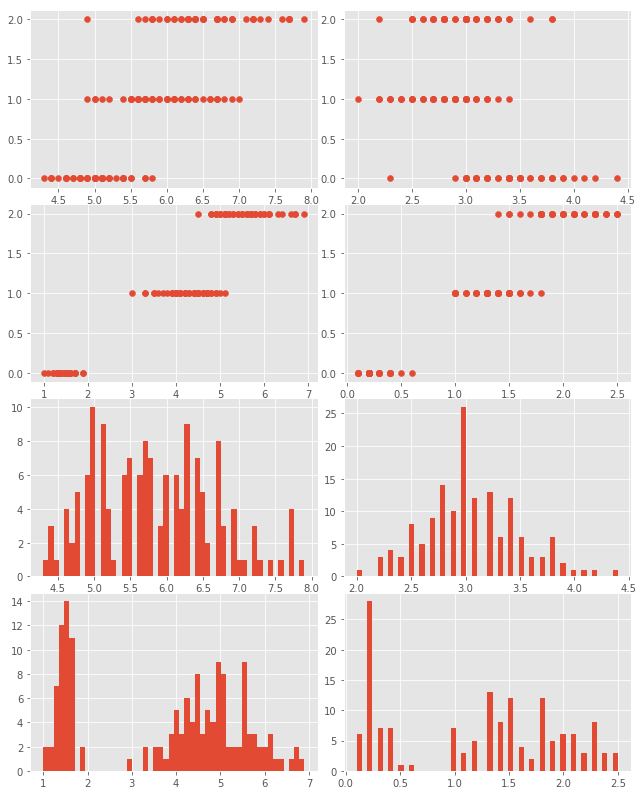

In [9]:
plt.figure(figsize=(22, 14))
Iris_EDA_fn(Target,Data)

<a id='K-means'></a>
** Kmeans Clustering **

In [10]:
def Kmeans_clustering_fn(K,rand_state,Traing_set):
    kmeans = KMeans(n_clusters=K, random_state=rand_state).fit(Traing_set)
    Lbls = kmeans.labels_
    clusters_result = kmeans.predict(Traing_set)
    centroids = kmeans.cluster_centers_
    print('Kmneans parameters : ', '\n', kmeans, '\n',
                 'Kmeans Labels for each points : ', '\n', Lbls ,'\n',
                 'prediction for the clustering : ', '\n', clusters_result, '\n',
                 'Clusters Centroids : ', '\n' ,centroids)

    return kmeans,Lbls, clusters_result, centroids


In [11]:
kmns_model,Lbls, clusters_result, centroid_index = Kmeans_clustering_fn(K=3,rand_state=0,Traing_set=Data)

Kmneans parameters :  
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0) 
 Kmeans Labels for each points :  
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 
 prediction for the clustering :  
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 
 Clusters Centroids :  
 [[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464

In [12]:
Lbls

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<a id='plot_clusters'></a>
** Plotting the data in each cluster**

In [13]:
def Plot_clusters_data(Data, Lbls):
    DT = Data
    lbl = Lbls
    colors = ["g.","r.","c.","y.","r.","c.","b."]
    for i in range(len(DT)):
        #print("coordinate:",Data[i],"lebel:",labels[i])
        plt.plot(DT[i][0],DT[i][1],colors[lbl[i]],markersize=10)
      

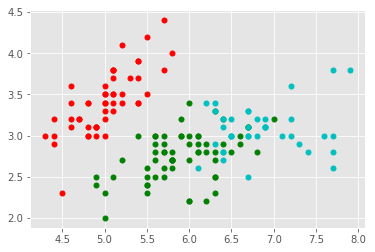

In [14]:
Plot_clusters_data(Data,Lbls)

<a id='spider'></a>
** Plotting Spider Charts for Centroid**

In [15]:
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


In [16]:
def unit_poly_verts(theta):
    """
    Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

In [17]:
def example_data():
    # The following data is centroid for each cluster.
    data = [
        ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'],
        ('Setosa', [ centroid_index[0,:]]),
        ('Versicolor', [ centroid_index[1,:]]),
        ('Virginica', [ centroid_index[2,:]])
        ]
    return data

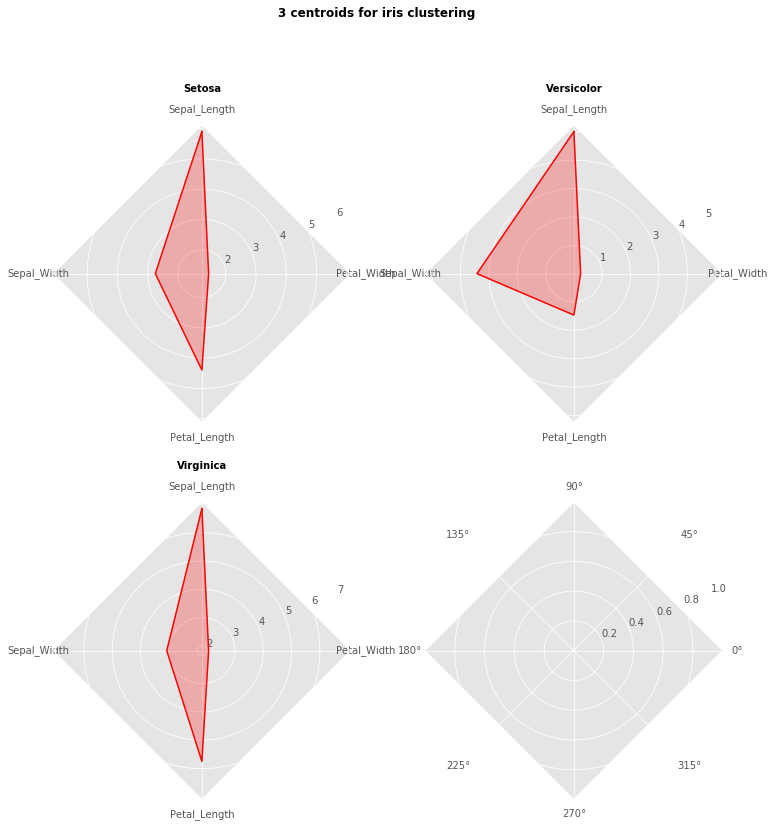

In [18]:
# main()
if __name__ == '__main__':
    N = 4
    theta = radar_factory(N, frame='polygon')
    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(12, 12), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['r', 'b', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([1, 2, 3, 4, 5, 6, 7, 8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    #labels = ('Setosa', 'Versicolor', 'Virginica')
    #legend = ax.legend(labels, loc=(0.9, .95),
    #                   labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '3 centroids for iris clustering',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

<a id='conclusions'></a>
# Conclusions

See you next time with Hierarchical Clustering